<a href="https://colab.research.google.com/github/akshat122402/Tata_Motors_Stock_Prediction_LSTM/blob/main/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('/content/Tata_Motors_Ltd._historical_data.csv')

data = data[['Date', 'Adj Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

data

<ipython-input-2-954fc355c4f2>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


,Adj Close
Date,
2000-03-01,16.114737
2000-04-01,16.114737
2000-05-01,16.114737
2000-06-01,16.114737
2000-07-01,16.114737
...,...
2023-08-28,602.200012
2023-08-29,606.549988
2023-08-30,605.549988


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
adj_close = data['Adj Close'].values.reshape(-1, 1)
adj_close = scaler.fit_transform(adj_close)
data = pd.DataFrame(adj_close, index=data.index, columns=['Scaled Adj Close'])

data

,Scaled Adj Close
Date,
2000-03-01,0.018315
2000-04-01,0.018315
2000-05-01,0.018315
2000-06-01,0.018315
2000-07-01,0.018315
...,...
2023-08-28,0.939636
2023-08-29,0.946474
2023-08-30,0.944902


In [4]:
def create_lstm_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        sequence_x = data[i:i + sequence_length]
        target_y = data[i + sequence_length:i + sequence_length + 1]

        X.append(sequence_x)
        y.append(target_y)

    return np.array(X), np.array(y)

sequence_length = 150

X, y = create_lstm_sequences(data, sequence_length)

In [5]:
X.shape, y.shape

((5736, 150, 1), (5736, 1, 1))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 150, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 150, 50)           0         
                                                                 
 dense (Dense)               (None, 150, 1)            51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

Epoch 1/50
130/130 [==============================] - 12s 22ms/step - loss: 0.0310 - val_loss: 0.0224
Epoch 2/50
130/130 [==============================] - 2s 13ms/step - loss: 0.0133 - val_loss: 0.0195
Epoch 3/50
130/130 [==============================] - 2s 12ms/step - loss: 0.0116 - val_loss: 0.0176
Epoch 4/50
130/130 [==============================] - 2s 12ms/step - loss: 0.0106 - val_loss: 0.0203
Epoch 5/50
130/130 [==============================] - 2s 12ms/step - loss: 0.0099 - val_loss: 0.0162
Epoch 6/50
130/130 [==============================] - 2s 12ms/step - loss: 0.0094 - val_loss: 0.0189
Epoch 7/50
130/130 [==============================] - 2s 18ms/step - loss: 0.0090 - val_loss: 0.0154
Epoch 8/50
130/130 [==============================] - 2s 18ms/step - loss: 0.0088 - val_loss: 0.0185
Epoch 9/50
130/130 [==============================] - 2s 13ms/step - loss: 0.0085 - val_loss: 0.0177
Epoch 10/50
130/130 [==============================] - 2s 12ms/step - loss: 0.0083 - val_l

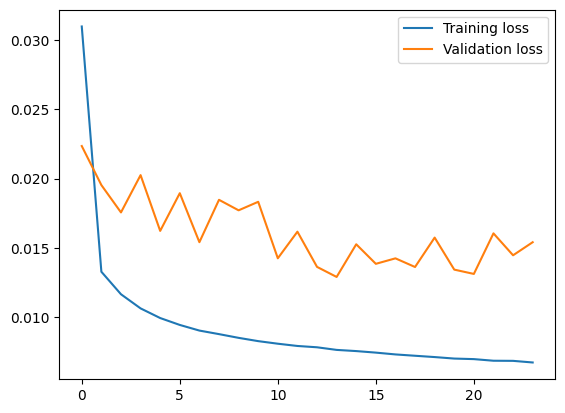

In [10]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [11]:
train_predictions = model.predict(X_train)

train_predictions,train_predictions.shape

144/144 [==============================] - 1s 5ms/step


(array([[[0.07278129],
         [0.09228188],
         [0.10326602],
         ...,
         [0.00365475],
         [0.00336818],
         [0.00304219]],
 
        [[0.07278129],
         [0.09228188],
         [0.10326602],
         ...,
         [0.00336817],
         [0.00304218],
         [0.00270532]],
 
        [[0.07278129],
         [0.09228188],
         [0.10326602],
         ...,
         [0.00304218],
         [0.00270532],
         [0.00237914]],
 
        ...,
 
        [[0.1034006 ],
         [0.17480294],
         [0.24986209],
         ...,
         [0.28863183],
         [0.28545478],
         [0.28166014]],
 
        [[0.10347842],
         [0.17501324],
         [0.24986477],
         ...,
         [0.28545478],
         [0.28166014],
         [0.27777377]],
 
        [[0.10355626],
         [0.17485484],
         [0.2504541 ],
         ...,
         [0.28166014],
         [0.27777377],
         [0.27459252]]], dtype=float32),
 (4588, 150, 1))

In [12]:
train_predicted_adj_close = train_predictions[:, -1, 0]

train_predicted_adj_close = train_predicted_adj_close.reshape(-1, 1)

train_predicted_adj_close = scaler.inverse_transform(train_predicted_adj_close)

train_predicted_adj_close,train_predicted_adj_close.shape

(array([[  6.399212 ],
        [  6.1849213],
        [  5.977422 ],
        ...,
        [183.63812  ],
        [181.16586  ],
        [179.14215  ]], dtype=float32),
 (4588, 1))

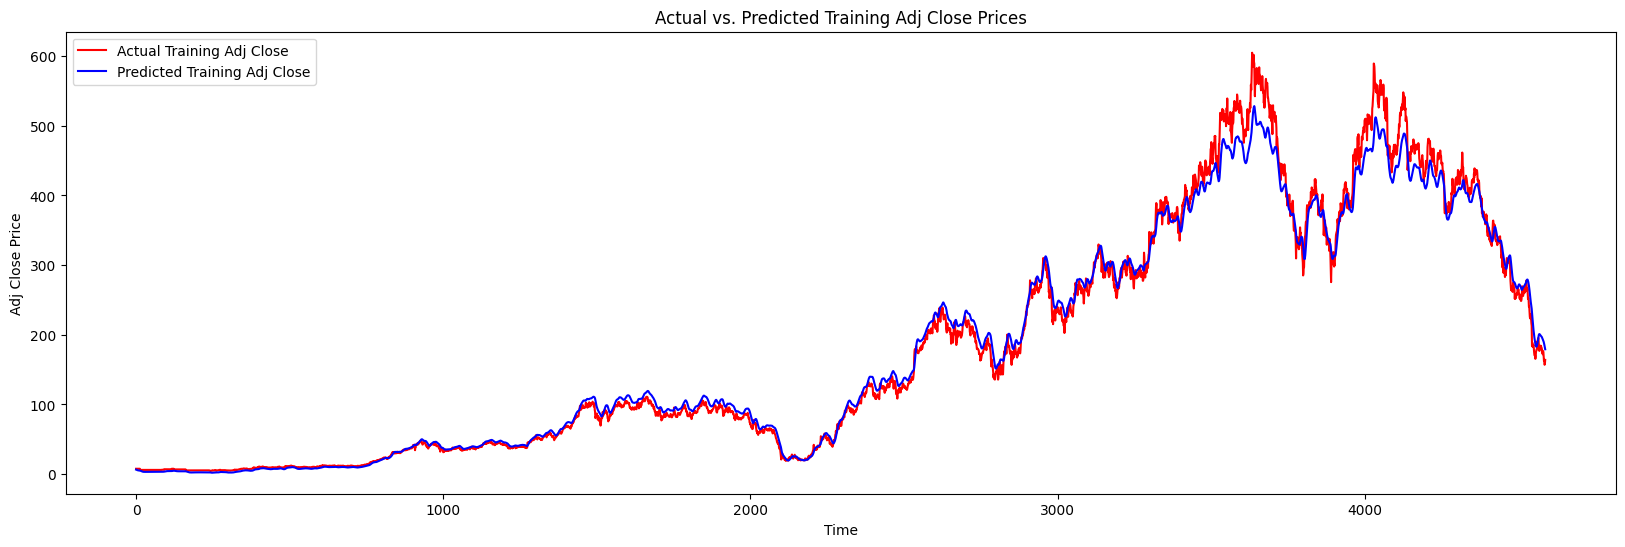

In [13]:
actual_train_adj_close = scaler.inverse_transform(X_train[:, -1])

plt.figure(figsize = (20, 6))
plt.plot(actual_train_adj_close, label='Actual Training Adj Close', color = 'red')
plt.plot(train_predicted_adj_close, label='Predicted Training Adj Close', color = 'blue')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.title('Actual vs. Predicted Training Adj Close Prices')
plt.legend()
plt.show()

In [14]:
test_predictions = model.predict(X_test)

test_predictions, test_predictions.shape

36/36 [==============================] - 0s 6ms/step


(array([[[0.10326927],
         [0.17527886],
         [0.25059003],
         ...,
         [0.2777738 ],
         [0.27459252],
         [0.2723564 ]],
 
        [[0.10416925],
         [0.17601454],
         [0.25089025],
         ...,
         [0.27459255],
         [0.2723564 ],
         [0.27098152]],
 
        [[0.10339087],
         [0.17444241],
         [0.24818979],
         ...,
         [0.2723564 ],
         [0.27098152],
         [0.270955  ]],
 
        ...,
 
        [[0.10850772],
         [0.18874544],
         [0.27527547],
         ...,
         [0.82354945],
         [0.82209486],
         [0.8207227 ]],
 
        [[0.10872214],
         [0.18976894],
         [0.27674726],
         ...,
         [0.82209486],
         [0.82072276],
         [0.81943136]],
 
        [[0.10937518],
         [0.19079506],
         [0.27715662],
         ...,
         [0.8207227 ],
         [0.8194313 ],
         [0.8179366 ]]], dtype=float32),
 (1148, 150, 1))

In [15]:
test_predicted_adj_close = test_predictions[:, -1, 0]

test_predicted_adj_close = test_predicted_adj_close.reshape(-1, 1)

test_predicted_adj_close = scaler.inverse_transform(test_predicted_adj_close)

test_predicted_adj_close,test_predicted_adj_close.shape

(array([[177.71968],
        [176.84506],
        [176.8282 ],
        ...,
        [526.55524],
        [525.73376],
        [524.7829 ]], dtype=float32),
 (1148, 1))

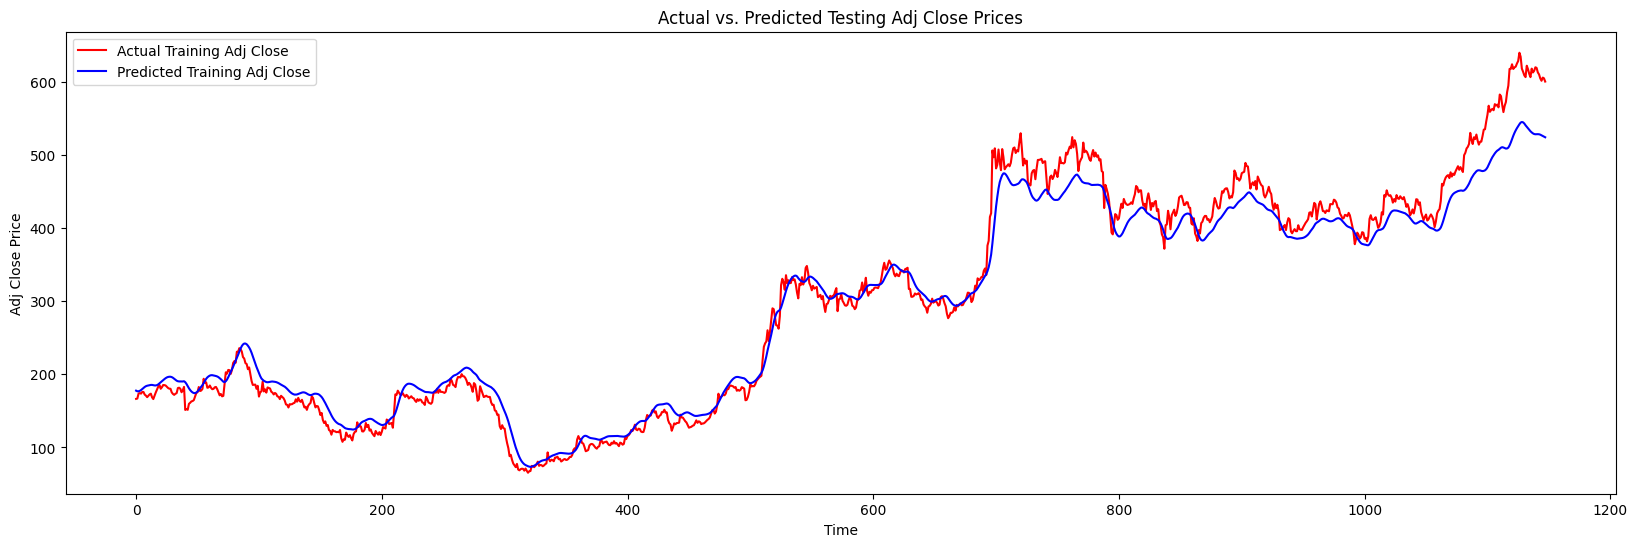

In [16]:
actual_test_adj_close = scaler.inverse_transform(X_test[:, -1])

plt.figure(figsize = (20, 6))
plt.plot(actual_test_adj_close, label='Actual Training Adj Close', color = 'red')
plt.plot(test_predicted_adj_close, label='Predicted Training Adj Close', color = 'blue')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.title('Actual vs. Predicted Testing Adj Close Prices')
plt.legend()
plt.show()

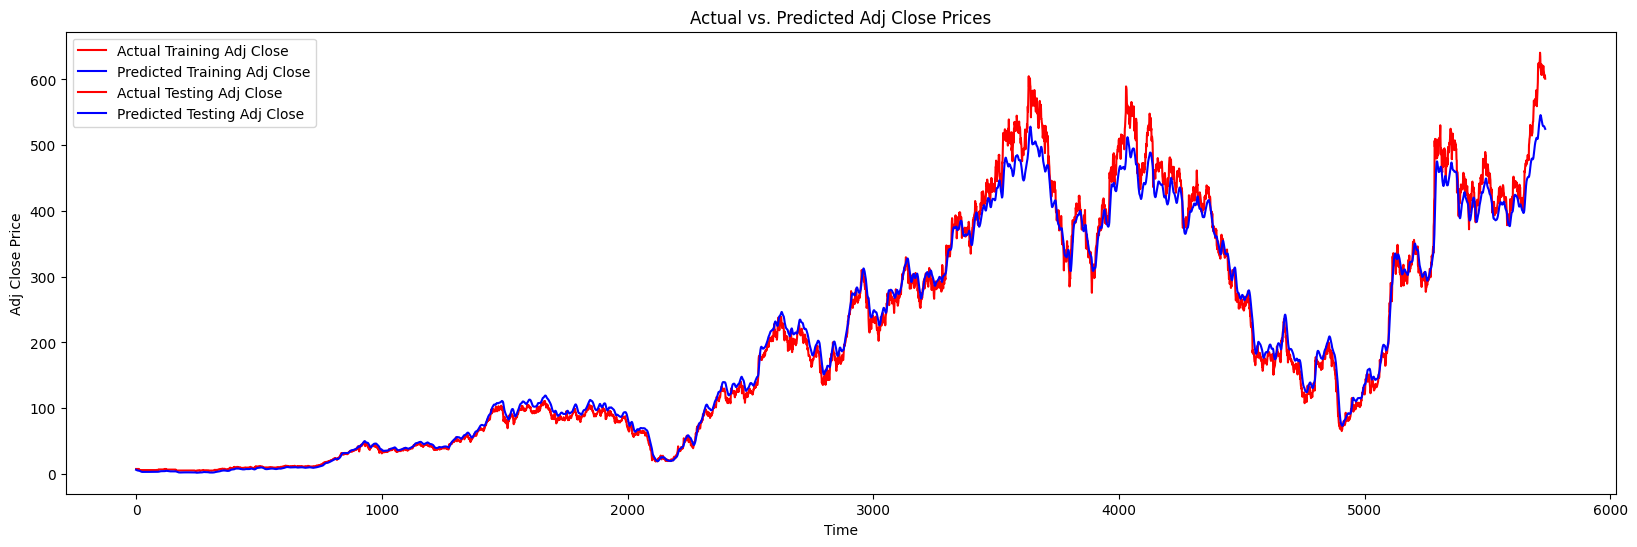

In [17]:
num_train_points = len(actual_train_adj_close)

x_train = range(num_train_points)
x_test = range(num_train_points, num_train_points + len(actual_test_adj_close))

plt.figure(figsize=(20, 6))

plt.plot(x_train, actual_train_adj_close, label='Actual Training Adj Close', color='red')
plt.plot(x_train, train_predicted_adj_close, label='Predicted Training Adj Close', color='blue')

plt.plot(x_test, actual_test_adj_close, label='Actual Testing Adj Close', color='red')
plt.plot(x_test, test_predicted_adj_close, label='Predicted Testing Adj Close', color='blue')

plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.title('Actual vs. Predicted Adj Close Prices')
plt.legend()
plt.show()


In [18]:
num_future_days = 100

future_predictions = []

last_sequence = X_test[-1]

for i in range(num_future_days):
    last_sequence = last_sequence.reshape(1, sequence_length, 1)

    next_day_prediction = model.predict(last_sequence)

    future_predictions.append(next_day_prediction[0, -1, 0])

    last_sequence = np.roll(last_sequence, shift=-1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction[0, -1, 0]

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

x_future = range(num_train_points + len(actual_test_adj_close), num_train_points + len(actual_test_adj_close) + num_future_days)


1/1 [==============================] - 0s 32ms/step


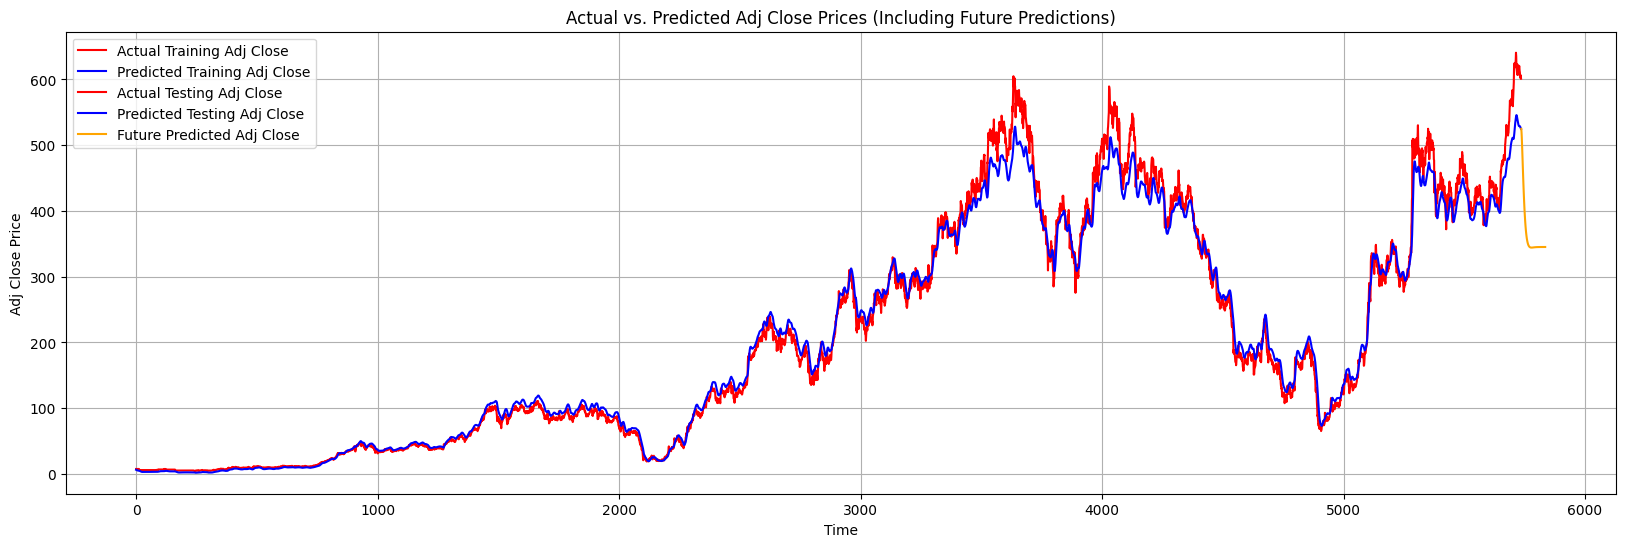

In [20]:
plt.figure(figsize=(20, 6))

plt.plot(x_train, actual_train_adj_close, label='Actual Training Adj Close', color='red')
plt.plot(x_train, train_predicted_adj_close, label='Predicted Training Adj Close', color='blue')

plt.plot(x_test, actual_test_adj_close, label='Actual Testing Adj Close', color='red')
plt.plot(x_test, test_predicted_adj_close, label='Predicted Testing Adj Close', color='blue')

plt.plot(x_future, future_predictions, label='Future Predicted Adj Close', color='orange')

plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.title('Actual vs. Predicted Adj Close Prices (Including Future Predictions)')
plt.grid()
plt.legend()
plt.show()

In [21]:
train_mae = mean_absolute_error(actual_train_adj_close, train_predicted_adj_close)
train_mse = mean_squared_error(actual_train_adj_close, train_predicted_adj_close)
train_rmse = mean_squared_error(actual_train_adj_close, train_predicted_adj_close, squared=False)

test_mae = mean_absolute_error(actual_test_adj_close, test_predicted_adj_close)
test_mse = mean_squared_error(actual_test_adj_close, test_predicted_adj_close)
test_rmse = mean_squared_error(actual_test_adj_close, test_predicted_adj_close, squared=False)

print("Training Set Metrics:")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")

print("\nTesting Set Metrics:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")


Training Set Metrics:
Mean Absolute Error (MAE): 11.25
Mean Squared Error (MSE): 314.39
Root Mean Squared Error (RMSE): 17.73

Testing Set Metrics:
Mean Absolute Error (MAE): 19.54
Mean Squared Error (MSE): 712.48
Root Mean Squared Error (RMSE): 26.69
